In [60]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


import datetime

import Cat

In [3]:
dataset = pd.read_csv('../../data/funda_train.csv')

# EDA

1. 0, Nan 값 체크

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [4]:
dataset.isin([0]).sum()

store_id               4481
card_id                   5
card_company              0
transacted_date           0
transacted_time           0
installment_term    6327632
region                    0
type_of_business          0
amount                   80
dtype: int64

In [5]:
dataset.isnull().sum() 

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

In [8]:
dataset['region'] = dataset['region'].fillna('지역 모름')
dataset['type_of_business'] = dataset['type_of_business'].fillna('업종 모름')

dataset.isnull().sum() # 결측지가 잘 대체됐는지 확인

store_id            0
card_id             0
card_company        0
transacted_date     0
transacted_time     0
installment_term    0
region              0
type_of_business    0
amount              0
dtype: int64

In [13]:
dataset['datetime'] = pd.to_datetime(dataset.transacted_date + " " + 
                                dataset.transacted_time, format='%Y-%m-%d %H:%M:%S')

dataset['time'] = dataset['datetime'].dt.time
dataset['day'] = dataset['datetime'].dt.day
dataset['month'] = dataset['datetime'].dt.month

In [14]:
dataset.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,datetime,time,day,month
0,0,0,b,2016-06-01,13:13,0,지역 모름,기타 미용업,1857.142857,2016-06-01 13:13:00,13:13:00,1,6
1,0,1,h,2016-06-01,18:12,0,지역 모름,기타 미용업,857.142857,2016-06-01 18:12:00,18:12:00,1,6
2,0,2,c,2016-06-01,18:52,0,지역 모름,기타 미용업,2000.000000,2016-06-01 18:52:00,18:52:00,1,6
3,0,3,a,2016-06-01,20:22,0,지역 모름,기타 미용업,7857.142857,2016-06-01 20:22:00,20:22:00,1,6
4,0,4,c,2016-06-02,11:06,0,지역 모름,기타 미용업,2000.000000,2016-06-02 11:06:00,11:06:00,2,6


In [17]:
drop_features = ['store_id', 'card_id', 'card_company', 'transacted_date',
       'transacted_time', 'installment_term', 'region', 'type_of_business','datetime']

#dataset_time = dataset_time.set_index('time')
dataset_times = dataset.drop(drop_features, axis=1)
dataset_times = dataset_times.sort_values(by=['time'], axis=0, ascending=True)

In [18]:
dataset_times

,amount,time,day,month
3093263,3428.571429,00:00:00,21,10
4985328,4714.285714,00:00:00,8,1
3537062,21428.571429,00:00:00,19,7
327899,1142.857143,00:00:00,20,7
5932538,12428.571429,00:00:00,2,11
...,...,...,...,...
182103,14285.714286,23:59:00,2,11
21988,5285.714286,23:59:00,4,7
1647177,39785.714286,23:59:00,30,11
1720597,12285.714286,23:59:00,18,10


In [48]:
grouped_time = (dataset['amount']/1000000).groupby(dataset['time'])
grouped_day = (dataset['amount']/10000000).groupby(dataset['day'])
grouped_month = (dataset['amount']/10000000).groupby(dataset['month'])

In [78]:
sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'malgun gothic'

<AxesSubplot:title={'center':'시간 별 매출(단위: 억원)'}, xlabel='time'>

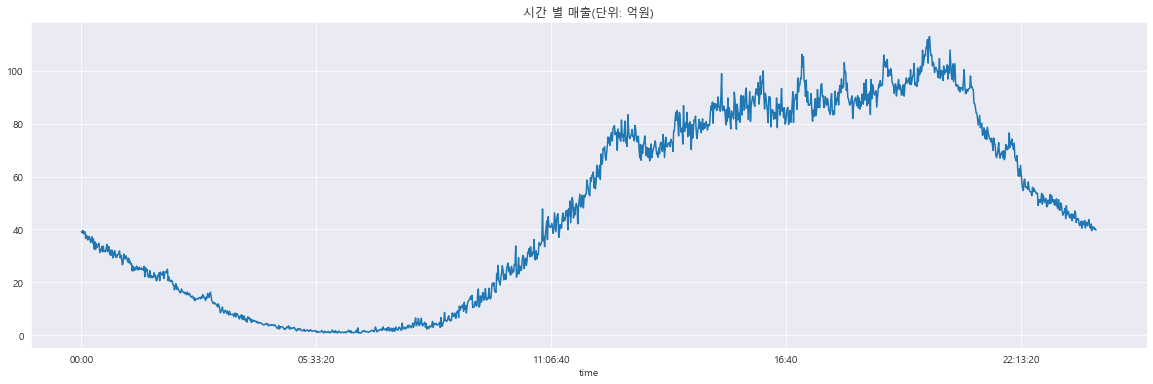

In [83]:
grouped_time.sum().plot(figsize = (20,6), 
                        title = '시간 별 매출(단위: 억원)')


<AxesSubplot:title={'center':'일 별 매출(단위: 억원)'}, xlabel='day'>

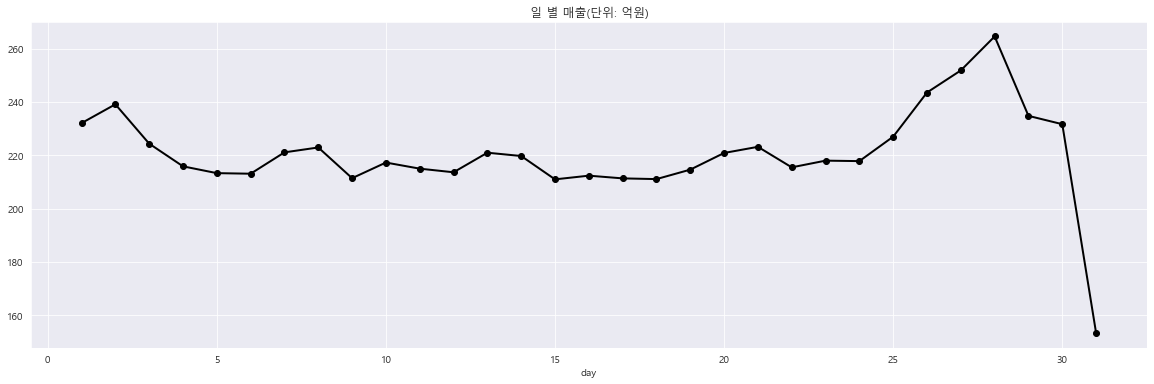

In [84]:
grouped_day.sum().plot(figsize = (20,6), 
                       title = '일 별 매출(단위: 억원)', 
                       marker='o',
                       linewidth=2,
                       color = 'k')

<AxesSubplot:title={'center':'월 별 매출(단위: 억원)'}, xlabel='month'>

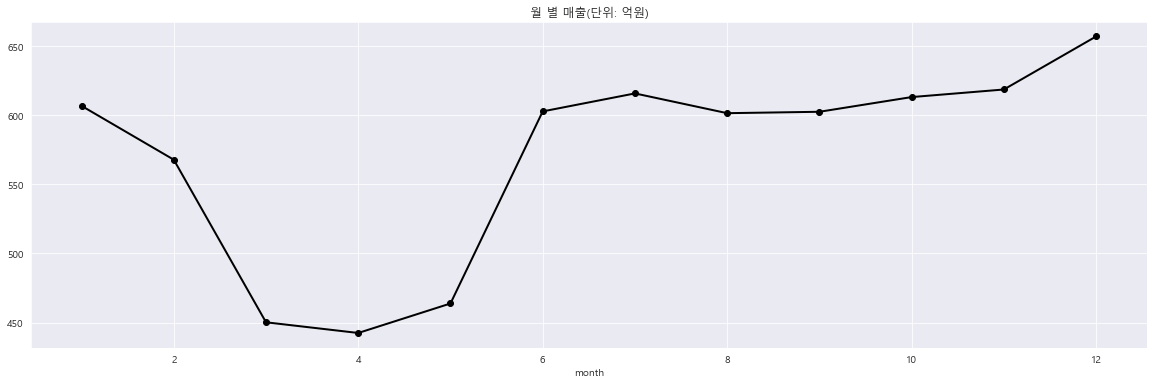

In [85]:
grouped_month.sum().plot(figsize = (20,6),
                         title = '월 별 매출(단위: 억원)', 
                         marker='o',
                         linewidth=2,
                         color = 'k')